# Basic ideas of the Principal Component Analysis (PCA)

The principal component analysis deals with the problem of fitting a
low-dimensional affine subspace $S$ of dimension $d$ much smaller than
the total dimension $D$ of the problem at hand (our data
set). Mathematically it can be formulated as a statistical problem or
a geometric problem.  In our discussion of the theorem for the
classical PCA, we will stay with a statistical approach. 
Historically, the PCA was first formulated in a statistical setting in order to estimate the principal component of a multivariate random variable.

We have a data set defined by a design/feature matrix $\boldsymbol{X}$ (see below for its definition) 
* Each data point is determined by $p$ extrinsic (measurement) variables

* We may want to ask the following question: Are there fewer intrinsic variables (say $d << p$) that still approximately describe the data?

* If so, these intrinsic variables may tell us something important and finding these intrinsic variables is what dimension reduction methods do. 

A good read is for example [Vidal, Ma and Sastry](https://www.springer.com/gp/book/9780387878102).



## Introducing the Covariance and Correlation functions

Before we discuss the PCA theorem, we need to remind ourselves about
the definition of the covariance and the correlation function. These are quantities 

Suppose we have defined two vectors
$\hat{x}$ and $\hat{y}$ with $n$ elements each. The covariance matrix $\boldsymbol{C}$ is defined as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{cov}[\boldsymbol{x},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{y},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{y},\boldsymbol{y}] \\
             \end{bmatrix},
$$

where for example

$$
\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

With this definition and recalling that the variance is defined as

$$
\mathrm{var}[\boldsymbol{x}]=\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})^2,
$$

we can rewrite the covariance matrix as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{var}[\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] & \mathrm{var}[\boldsymbol{y}] \\
             \end{bmatrix}.
$$

The covariance takes values between zero and infinity and may thus
lead to problems with loss of numerical precision for particularly
large values. It is common to scale the covariance matrix by
introducing instead the correlation matrix defined via the so-called
correlation function

$$
\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]=\frac{\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}]}{\sqrt{\mathrm{var}[\boldsymbol{x}] \mathrm{var}[\boldsymbol{y}]}}.
$$

The correlation function is then given by values $\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]
\in [-1,1]$. This avoids eventual problems with too large values. We
can then define the correlation matrix for the two vectors $\boldsymbol{x}$
and $\boldsymbol{y}$ as

$$
\boldsymbol{K}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} 1 & \mathrm{corr}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{corr}[\boldsymbol{y},\boldsymbol{x}] & 1 \\
             \end{bmatrix},
$$

In the above example this is the function we constructed using **pandas**.


In our derivation of the various regression algorithms like **Ordinary Least Squares** or **Ridge regression**
we defined the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix},
$$

with $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors/features $p$  refering to the column numbers and the
entries $n$ being the row elements.
We can rewrite the design/feature matrix in terms of its column vectors as

$$
\boldsymbol{X}=\begin{bmatrix} \boldsymbol{x}_0 & \boldsymbol{x}_1 & \boldsymbol{x}_2 & \dots & \dots & \boldsymbol{x}_{p-1}\end{bmatrix},
$$

with a given vector

$$
\boldsymbol{x}_i^T = \begin{bmatrix}x_{0,i} & x_{1,i} & x_{2,i}& \dots & \dots x_{n-1,i}\end{bmatrix}.
$$

With these definitions, we can now rewrite our $2\times 2$
correaltion/covariance matrix in terms of a moe general design/feature
matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$. This leads to a $p\times p$
covariance matrix for the vectors $\boldsymbol{x}_i$ with $i=0,1,\dots,p-1$

$$
\boldsymbol{C}[\boldsymbol{x}] = \begin{bmatrix}
\mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_1] & \mathrm{var}[\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & \mathrm{var}[\boldsymbol{x}_{p-1}]\\
\end{bmatrix},
$$

and the correlation matrix

$$
\boldsymbol{K}[\boldsymbol{x}] = \begin{bmatrix}
1 & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_0] & 1  & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_1] & 1 & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & 1\\
\end{bmatrix},
$$

The Numpy function **np.cov** calculates the covariance elements using
the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have
the exact mean values.  The following simple function uses the
**np.vstack** function which takes each vector of dimension $1\times n$
and produces a $2\times n$ matrix $\boldsymbol{W}$

$$
\boldsymbol{W} = \begin{bmatrix} x_0 & y_0 \\
                          x_1 & y_1 \\
                          x_2 & y_2\\
                          \dots & \dots \\
                          x_{n-2} & y_{n-2}\\
                          x_{n-1} & y_{n-1} & 
             \end{bmatrix},
$$

which in turn is converted into into the $2\times 2$ covariance matrix
$\boldsymbol{C}$ via the Numpy function **np.cov()**. We note that we can also calculate
the mean value of each set of samples $\boldsymbol{x}$ etc using the Numpy
function **np.mean(x)**. We can also extract the eigenvalues of the
covariance matrix through the **np.linalg.eig()** function.

In [1]:
# Importing various packages
import numpy as np
n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
W = np.vstack((x, y))
C = np.cov(W)
print(C)

0.05665875086534638
4.128393685824704
[[ 0.93987367  2.98650457]
 [ 2.98650457 10.47544463]]


## Correlation Matrix

The previous example can be converted into the correlation matrix by
simply scaling the matrix elements with the variances.  We should also
subtract the mean values for each column. This leads to the following
code which sets up the correlations matrix for the previous example in
a more brute force way. Here we scale the mean values for each column of the design matrix, calculate the relevant mean values and variances and then finally set up the $2\times 2$ correlation matrix (since we have only two vectors).

In [2]:
import numpy as np
n = 100
# define two vectors                                                                                           
x = np.random.random(size=n)
y = 4+3*x+np.random.normal(size=n)
#scaling the x and y vectors                                                                                   
x = x - np.mean(x)
y = y - np.mean(y)
variance_x = np.sum(x@x)/n
variance_y = np.sum(y@y)/n
print(variance_x)
print(variance_y)
cov_xy = np.sum(x@y)/n
cov_xx = np.sum(x@x)/n
cov_yy = np.sum(y@y)/n
C = np.zeros((2,2))
C[0,0]= cov_xx/variance_x
C[1,1]= cov_yy/variance_y
C[0,1]= cov_xy/np.sqrt(variance_y*variance_x)
C[1,0]= C[0,1]
print(C)

0.07617734331359052
1.6957182489166325
[[1.         0.68029423]
 [0.68029423 1.        ]]


We see that the matrix elements along the diagonal are one as they
should be and that the matrix is symmetric. Furthermore, diagonalizing
this matrix we easily see that it is a positive definite matrix.

The above procedure with **numpy** can be made more compact if we use **pandas**.


We whow here how we can set up the correlation matrix using **pandas**, as done in this simple code

In [3]:
import numpy as np
import pandas as pd
n = 10
x = np.random.normal(size=n)
x = x - np.mean(x)
y = 4+3*x+np.random.normal(size=n)
y = y - np.mean(y)
X = (np.vstack((x, y))).T
print(X)
Xpd = pd.DataFrame(X)
print(Xpd)
correlation_matrix = Xpd.corr()
print(correlation_matrix)

[[-0.29087396  0.13244119]
 [-1.21617146 -2.69678073]
 [-1.37024276 -3.76728511]
 [ 0.49342785  1.50638863]
 [ 0.4155974  -0.07435812]
 [ 0.64813145  1.94455739]
 [-0.48364163 -2.62178739]
 [-0.3807176  -1.25007671]
 [ 1.73036439  5.00709577]
 [ 0.45412633  1.81980509]]
          0         1
0 -0.290874  0.132441
1 -1.216171 -2.696781
2 -1.370243 -3.767285
3  0.493428  1.506389
4  0.415597 -0.074358
5  0.648131  1.944557
6 -0.483642 -2.621787
7 -0.380718 -1.250077
8  1.730364  5.007096
9  0.454126  1.819805
          0         1
0  1.000000  0.961042
1  0.961042  1.000000


We expand this model to the Franke function discussed above.

In [4]:
# Common imports
import numpy as np
import pandas as pd


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 4
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    

Xpd = pd.DataFrame(X)
# subtract the mean values and set up the covariance matrix
Xpd = Xpd - Xpd.mean()
covariance_matrix = Xpd.cov()
print(covariance_matrix)

     0         1         2         3         4         5         6         7   \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.0  0.068131  0.073423  0.069509  0.072262  0.074935  0.062568  0.064540   
2   0.0  0.073423  0.079638  0.075544  0.078741  0.081836  0.068222  0.070480   
3   0.0  0.069509  0.075544  0.075689  0.079013  0.082264  0.070991  0.073416   
4   0.0  0.072262  0.078741  0.079013  0.082596  0.086101  0.074265  0.076876   
5   0.0  0.074935  0.081836  0.082264  0.086101  0.089859  0.077488  0.080287   
6   0.0  0.062568  0.068222  0.070991  0.074265  0.077488  0.068479  0.070924   
7   0.0  0.064540  0.070480  0.073416  0.076876  0.080287  0.070924  0.073514   
8   0.0  0.066545  0.072773  0.075883  0.079535  0.083138  0.073418  0.076157   
9   0.0  0.068597  0.075114  0.078409  0.082256  0.086058  0.075974  0.078867   
10  0.0  0.055105  0.060160  0.064322  0.067367  0.070380  0.063327  0.065650   
11  0.0  0.056730  0.062004 

We note here that the covariance is zero for the first rows and
columns since all matrix elements in the design matrix were set to one
(we are fitting the function in terms of a polynomial of degree $n$). We would however not include the intercept
and wee can simply
drop these elements and construct a correlation
matrix without them. 



We can rewrite the covariance matrix in a more compact form in terms of the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{C}[\boldsymbol{x}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}= \mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}].
$$

To see this let us simply look at a design matrix $\boldsymbol{X}\in {\mathbb{R}}^{2\times 2}$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{00} & x_{01}\\
x_{10} & x_{11}\\
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{x}_{0} & \boldsymbol{x}_{1}\\
\end{bmatrix}.
$$

If we then compute the expectation value

$$
\mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}=\begin{bmatrix}
x_{00}^2+x_{01}^2 & x_{00}x_{10}+x_{01}x_{11}\\
x_{10}x_{00}+x_{11}x_{01} & x_{10}^2+x_{11}^2\\
\end{bmatrix},
$$

which is just

$$
\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]=\begin{bmatrix} \mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1] \\
                              \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1] \\
             \end{bmatrix},
$$

where we wrote $$\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]$$ to indicate that this the covariance of the vectors $\boldsymbol{x}$ of the design/feature matrix $\boldsymbol{X}$.

It is easy to generalize this to a matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$.



## Towards the PCA theorem

We have that the covariance matrix (the correlation matrix involves a simple rescaling) is given as

$$
\boldsymbol{C}[\boldsymbol{x}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}= \mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}].
$$

Let us now assume that we can perform a series of orthogonal transformations where we employ some orthogonal matrices $\boldsymbol{S}$.
These matrices are defined as $\boldsymbol{S}\in {\mathbb{R}}^{p\times p}$ and obey the orthogonality requirements $\boldsymbol{S}\boldsymbol{S}^T=\boldsymbol{S}^T\boldsymbol{S}=\boldsymbol{I}$. The matrix can be written out in terms of the column vectors $\boldsymbol{s}_i$ as $\boldsymbol{S}=[\boldsymbol{s}_0,\boldsymbol{s}_1,\dots,\boldsymbol{s}_{p-1}]$ and $\boldsymbol{s}_i \in {\mathbb{R}}^{p}$.

Assume also that there is a transformation $\boldsymbol{S}^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S}=\boldsymbol{C}[\boldsymbol{y}]$ such that the new matrix $\boldsymbol{C}[\boldsymbol{y}]$ is diagonal with elements $[\lambda_0,\lambda_1,\lambda_2,\dots,\lambda_{p-1}]$.  

That is we have

$$
\boldsymbol{C}[\boldsymbol{y}] = \mathbb{E}[\boldsymbol{S}^T\boldsymbol{X}^T\boldsymbol{X}T\boldsymbol{S}]=\boldsymbol{S}^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S},
$$

since the matrix $\boldsymbol{S}$ is not a data dependent matrix.   Multiplying with $\boldsymbol{S}$ from the left we have

$$
\boldsymbol{S}\boldsymbol{C}[\boldsymbol{y}] = \boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S},
$$

and since $\boldsymbol{C}[\boldsymbol{y}]$ is diagonal we have for a given eigenvalue $i$ of the covariance matrix that

$$
\boldsymbol{S}_i\lambda_i = \boldsymbol{C}[\boldsymbol{x}]\boldsymbol{S}_i.
$$

In the derivation of the PCA theorem we will assume that the eigenvalues are ordered in descending order, that is
$\lambda_0 > \lambda_1 > \dots > \lambda_{p-1}$. 


The eigenvalues tell us then how much we need to stretch the
corresponding eigenvectors. Dimensions with large eigenvalues have
thus large variations (large variance) and define therefore useful
dimensions. The data points are more spread out in the direction of
these eigenvectors.  Smaller eigenvalues mean on the other hand that
the corresponding eigenvectors are shrunk accordingly and the data
points are tightly bunched together and there is not much variation in
these specific directions. Hopefully then we could leave it out
dimensions where the eigenvalues are very small. If $p$ is very large,
we could then aim at reducing $p$ to $l << p$ and handle only $l$
features/predictors.

### The Algorithm before theorem

Here's how we would proceed in setting up the algorithm for the PCA, see also discussion below here. 
* Set up the datapoints for the design/feature matrix $\boldsymbol{X}$ with $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors/features $p$  referring to the column numbers and the entries $n$ being the row elements.

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix},
$$

* Center the data by subtracting the mean value for each column. This leads to a new matrix $\boldsymbol{X}\rightarrow \overline{\boldsymbol{X}}$.

* Compute then the covariance/correlation matrix $\mathbb{E}[\overline{\boldsymbol{X}}^T\overline{\boldsymbol{X}}]$.

* Find the eigenpairs of $\boldsymbol{C}$ with eigenvalues $[\lambda_0,\lambda_1,\dots,\lambda_{p-1}]$ and eigenvectors $[\boldsymbol{s}_0,\boldsymbol{s}_1,\dots,\boldsymbol{s}_{p-1}]$.

* Order the eigenvalue (and the eigenvectors accordingly) in order of decreasing eigenvalues.

* Keep only those $l$ eigenvalues larger than a selected threshold value, discarding thus $p-l$ features since we expect small variations in the data here.

### Writing our own PCA code

We will use a simple example first with two-dimensional data
drawn from a multivariate normal distribution with the following mean and covariance matrix (we have fixed these quantities but will play around with them below):

$$
\mu = (-1,2) \qquad \Sigma = \begin{bmatrix} 4 & 2 \\
2 & 2
\end{bmatrix}
$$

Note that the mean refers to each column of data. 
We will generate $n = 10000$ points $X = \{ x_1, \ldots, x_N \}$ from
this distribution, and store them in the $1000 \times 2$ matrix $\boldsymbol{X}$. This is our design matrix where we have forced the covariance and mean values to take specific values.

The following Python code aids in setting up the data and writing out the design matrix.
Note that the function **multivariate** returns also the covariance discussed above and that it is defined by dividing by $n-1$ instead of $n$.

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
n = 10000
mean = (-1, 2)
cov = [[4, 2], [2, 2]]
X = np.random.multivariate_normal(mean, cov, n)

Now we are going to implement the PCA algorithm. We will break it down into various substeps.


The first step of PCA is to compute the sample mean of the data and use it to center the data. Recall that the sample mean is

$$
\mu_n = \frac{1}{n} \sum_{i=1}^n x_i
$$

and the mean-centered data $\bar{X} = \{ \bar{x}_1, \ldots, \bar{x}_n \}$ takes the form

$$
\bar{x}_i = x_i - \mu_n.
$$

When you are done with these steps, print out $\mu_n$ to verify it is
close to $\mu$ and plot your mean centered data to verify it is
centered at the origin! 
The following code elements perform these operations using **pandas** or using our own functionality for doing so. The latter, using **numpy** is rather simple through the **mean()** function.

In [6]:
df = pd.DataFrame(X)
# Pandas does the centering for us
df = df -df.mean()
# we center it ourselves
X_centered = X - X.mean(axis=0)

Alternatively, we could use the functions we discussed
earlier for scaling the data set.  That is, we could have used the
**StandardScaler** function in **Scikit-Learn**, a function which ensures
that for each feature/predictor we study the mean value is zero and
the variance is one (every column in the design/feature matrix).  You
would then not get the same results, since we divide by the
variance. The diagonal covariance matrix elements will then be one,
while the non-diagonal ones need to be divided by $2\sqrt{2}$ for our
specific case.


Now we are going to use the mean centered data to compute the sample covariance of the data by using the following equation

$$
\Sigma_n = \frac{1}{n-1} \sum_{i=1}^n \bar{x}_i^T \bar{x}_i = \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu_n)^T (x_i - \mu_n)
$$

where the data points $x_i \in \mathbb{R}^p$ (here in this example $p = 2$) are column vectors and $x^T$ is the transpose of $x$.
We can write our own code or simply use either the functionaly of **numpy** or that of **pandas**, as follows

In [7]:
print(df.cov())
print(np.cov(X_centered.T))

          0         1
0  4.060824  2.038890
1  2.038890  2.029664
[[4.06082419 2.03888998]
 [2.03888998 2.02966421]]


Note that the way we define the covariance matrix here has a factor $n-1$ instead of $n$. This is included in the **cov()** function by **numpy** and **pandas**. 
Our own code here is not very elegant and asks for obvious improvements. It is tailored to this specific $2\times 2$ covariance matrix.

Centered covariance using own code
[[4.06082419 2.03888998]
 [2.03888998 2.02966421]]


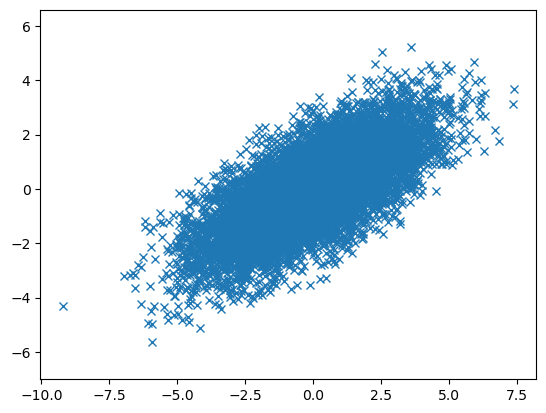

In [8]:
# extract the relevant columns from the centered design matrix of dim n x 2
x = X_centered[:,0]
y = X_centered[:,1]
Cov = np.zeros((2,2))
Cov[0,1] = np.sum(x.T@y)/(n-1.0)
Cov[0,0] = np.sum(x.T@x)/(n-1.0)
Cov[1,1] = np.sum(y.T@y)/(n-1.0)
Cov[1,0]= Cov[0,1]
print("Centered covariance using own code")
print(Cov)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

Depending on the number of points $n$, we will get results that are close to the covariance values defined above.
The plot shows how the data are clustered around a line with slope close to one. Is this expected?  Try to change the covariance and the mean values. For example, try to make the variance of the first element much larger than that of the second diagonal element. Try also to shrink the covariance  (the non-diagonal elements) and see how the data points are distributed. 

### Diagonalize the sample covariance matrix to obtain the principal components

Now we are ready to solve for the principal components! To do so we
diagonalize the sample covariance matrix $\Sigma$. We can use the
function **np.linalg.eig** to do so. It will return the eigenvalues and
eigenvectors of $\Sigma$. Once we have these we can perform the 
following tasks:

* We compute the percentage of the total variance captured by the first principal component

* We plot the mean centered data and lines along the first and second principal components

* Then we project the mean centered data onto the first and second principal components, and plot the projected data. 

* Finally, we approximate the data as

$$
x_i \approx \tilde{x}_i = \mu_n + \langle x_i, v_0 \rangle v_0
$$

where $v_0$ is the first principal component. 

Collecting all these steps we can write our own PCA function and
compare this with the functionality included in **Scikit-Learn**.  

The code here outlines some of the elements we could include in the
analysis. Feel free to extend upon this in order to address the above
questions.

In [9]:
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Cov)
# sort eigenvectors and eigenvalues
#permute = EigValues.argsort()
#EigValues = EigValues[permute]
#EigVectors = EigVectors[:,permute]
print("Eigenvalues of Covariance matrix")
for i in range(2):
    print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
print("First eigenvector")
print(FirstEigvector)
print("Second eigenvector")
print(SecondEigvector)
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2Dsl = pca.fit_transform(X)
print("Eigenvector of largest eigenvalue")
print(pca.components_.T[:, 0])

Eigenvalues of Covariance matrix
5.323066643161066
0.7674217625964539
First eigenvector
[0.85025162 0.52637646]
Second eigenvector
[-0.52637646  0.85025162]


Eigenvector of largest eigenvalue
[-0.85025162 -0.52637646]


This code does not contain all the above elements, but it shows how we can use **Scikit-Learn** to extract the eigenvector which corresponds to the largest eigenvalue. Try to address the questions we pose before the above code.  Try also to change the values of the covariance matrix by making one of the diagonal elements much larger than the other. What do you observe then? 


## Classical PCA Theorem

We assume now that we have a design matrix $\boldsymbol{X}$ which has been
centered as discussed above. For the sake of simplicity we skip the
overline symbol. The matrix is defined in terms of the various column
vectors $[\boldsymbol{x}_0,\boldsymbol{x}_1,\dots, \boldsymbol{x}_{p-1}]$ each with dimension
$\boldsymbol{x}\in {\mathbb{R}}^{n}$.



The PCA theorem states that minimizing the above reconstruction error
corresponds to setting $\boldsymbol{W}=\boldsymbol{S}$, the orthogonal matrix which
diagonalizes the empirical covariance(correlation) matrix. The optimal
low-dimensional encoding of the data is then given by a set of vectors
$\boldsymbol{z}_i$ with at most $l$ vectors, with $l << p$, defined by the
orthogonal projection of the data onto the columns spanned by the
eigenvectors of the covariance(correlations matrix).




To show the PCA theorem let us start with the assumption that there is one vector $\boldsymbol{s}_0$ which corresponds to a solution which minimized the reconstruction error $J$. This is an orthogonal vector. It means that we now approximate the reconstruction error in terms of $\boldsymbol{w}_0$ and $\boldsymbol{z}_0$ as



We are almost there, we have obtained a relation between minimizing
the reconstruction error and the variance and the covariance
matrix. Minimizing the error is equivalent to maximizing the variance
of the projected data.


We could trivially maximize the variance of the projection (and
thereby minimize the error in the reconstruction function) by letting
the norm-2 of $\boldsymbol{w}_0$ go to infinity. However, this norm since we
want the matrix $\boldsymbol{W}$ to be an orthogonal matrix, is constrained by
$\vert\vert \boldsymbol{w}_0 \vert\vert_2^2=1$. Imposing this condition via a
Lagrange multiplier we can then in turn maximize

$$
J(\boldsymbol{w}_0)= \boldsymbol{w}_0^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0+\lambda_0(1-\boldsymbol{w}_0^T\boldsymbol{w}_0).
$$

Taking the derivative with respect to $\boldsymbol{w}_0$ we obtain

$$
\frac{\partial J(\boldsymbol{w}_0)}{\partial \boldsymbol{w}_0}= 2\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0-2\lambda_0\boldsymbol{w}_0=0,
$$

meaning that

$$
\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0=\lambda_0\boldsymbol{w}_0.
$$

**The direction that maximizes the variance (or minimizes the construction error) is an eigenvector of the covariance matrix**! If we left multiply with $\boldsymbol{w}_0^T$ we have the variance of the projected data is

$$
\boldsymbol{w}_0^T\boldsymbol{C}[\boldsymbol{x}]\boldsymbol{w}_0=\lambda_0.
$$

If we want to maximize the variance (minimize the construction error)
we simply pick the eigenvector of the covariance matrix with the
largest eigenvalue. This establishes the link between the minimization
of the reconstruction function $J$ in terms of an orthogonal matrix
and the maximization of the variance and thereby the covariance of our
observations encoded in the design/feature matrix $\boldsymbol{X}$.

The proof
for the other eigenvectors $\boldsymbol{w}_1,\boldsymbol{w}_2,\dots$ can be
established by applying the above arguments and using the fact that
our basis of eigenvectors is orthogonal, see [Murphy chapter
12.2](https://mitpress.mit.edu/books/machine-learning-1).  The
discussion in chapter 12.2 of Murphy's text has also a nice link with
the Singular Value Decomposition theorem. For categorical data, see
chapter 12.4 and discussion therein.

For more details, see for example [Vidal, Ma and Sastry, chapter 2](https://www.springer.com/gp/book/9780387878102).


## Geometric Interpretation and link with Singular Value Decomposition

For a detailed demonstration of the geometric interpretation, see [Vidal, Ma and Sastry, section 2.1.2](https://www.springer.com/gp/book/9780387878102).


Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm.
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

The following Python code uses NumPy’s **svd()** function to obtain all the principal components of the
training set, then extracts the first two principal components. First we center the data using either **pandas** or our own code

In [10]:
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 vanilla matrix 
rows = 10
cols = 5
X = np.random.randn(rows,cols)
df = pd.DataFrame(X)
# Pandas does the centering for us
df = df -df.mean()
display(df)

# we center it ourselves
X_centered = X - X.mean(axis=0)
# Then check the difference between pandas and our own set up
print(X_centered-df)
#Now we do an SVD
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)
print(X2D)

,0,1,2,3,4
0,-1.574465,0.259153,1.197370,0.147400,0.649382
1,0.689519,0.137652,-1.025709,0.210340,-0.076938
2,-0.282727,0.351636,-0.539261,1.216683,0.340782
3,0.070889,-0.614808,1.074067,-0.038300,-1.450257
4,1.794282,1.458078,-0.207545,-0.442600,-0.147420
5,1.112383,0.647473,1.405890,0.073598,-0.276263
6,0.397700,-1.526744,-0.712018,1.216290,0.418506
7,-0.280647,1.106095,-1.646283,-0.956563,-1.564374
8,-0.369139,-0.751699,0.051649,-0.213103,0.967809
9,-1.557795,-1.066837,0.401842,-1.213743,1.138775


     0    1    2    3    4
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0
7  0.0  0.0  0.0  0.0  0.0
8  0.0  0.0  0.0  0.0  0.0
9  0.0  0.0  0.0  0.0  0.0
[[-1.5378811  -0.94639099]
 [ 0.86145244  0.89288636]
 [-0.00445655  0.81633628]
 [ 0.07145103 -1.00433417]
 [ 2.03707133 -0.48476997]
 [ 0.72174172 -1.4557763 ]
 [-0.55854694  1.60673226]
 [ 1.6999536   0.43766686]
 [-1.10405456  0.31718909]
 [-2.18673098 -0.17953942]]


PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering
the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t
forget to center the data first.

Once you have identified all the principal components, you can reduce the dimensionality of the dataset
down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.
Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

In [11]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

## PCA and scikit-learn

Scikit-Learn’s PCA class implements PCA using SVD decomposition just like we did before. The
following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note
that it automatically takes care of centering the data):

In [12]:
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
print(X2D)

[[ 1.5378811  -0.94639099]
 [-0.86145244  0.89288636]
 [ 0.00445655  0.81633628]
 [-0.07145103 -1.00433417]
 [-2.03707133 -0.48476997]
 [-0.72174172 -1.4557763 ]
 [ 0.55854694  1.60673226]
 [-1.6999536   0.43766686]
 [ 1.10405456  0.31718909]
 [ 2.18673098 -0.17953942]]


After fitting the PCA transformer to the dataset, you can access the principal components using the
components variable (note that it contains the PCs as horizontal vectors, so, for example, the first
principal component is equal to

In [13]:
pca.components_.T[:, 0]

array([-0.62373464, -0.5303329 ,  0.317367  ,  0.01873344,  0.47815203])

Another very useful piece of information is the explained variance ratio of each principal component,
available via the $explained\_variance\_ratio$ variable. It indicates the proportion of the dataset’s
variance that lies along the axis of each principal component. 

## Back to the Cancer Data
We can now repeat the above but applied to real data, in this case our breast cancer data.
Here we compute performance scores on the training data using logistic regression.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Train set accuracy from Logistic Regression: {:.2f}".format(logreg.score(X_train,y_train)))
# We scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Then perform again a log reg fit
logreg.fit(X_train_scaled, y_train)
print("Train set accuracy scaled data: {:.2f}".format(logreg.score(X_train_scaled,y_train)))
#thereafter we do a PCA with Scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D_train = pca.fit_transform(X_train_scaled)
# and finally compute the log reg fit and the score on the training data	
logreg.fit(X2D_train,y_train)
print("Train set accuracy scaled and PCA data: {:.2f}".format(logreg.score(X2D_train,y_train)))

Train set accuracy from Logistic Regression: 0.95
Train set accuracy scaled data: 0.99
Train set accuracy scaled and PCA data: 0.96


/Users/mhjensen/miniforge3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We see that our training data after the PCA decomposition has a performance similar to the non-scaled data. 


Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to
choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).
Unless, of course, you are reducing dimensionality for data visualization — in that case you will
generally want to reduce the dimensionality down to 2 or 3.
The following code computes PCA without reducing dimensionality, then computes the minimum number
of dimensions required to preserve 95% of the training set’s variance:

In [15]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

You could then set $n\_components=d$ and run PCA again. However, there is a much better option: instead
of specifying the number of principal components you want to preserve, you can set $n\_components$ to be
a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [16]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

### Incremental PCA

One problem with the preceding implementation of PCA is that it requires the whole training set to fit in
memory in order for the SVD algorithm to run. Fortunately, Incremental PCA (IPCA) algorithms have
been developed: you can split the training set into mini-batches and feed an IPCA algorithm one minibatch
at a time. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new
instances arrive).


### Randomized PCA

Scikit-Learn offers yet another option to perform PCA, called Randomized PCA. This is a stochastic
algorithm that quickly finds an approximation of the first d principal components. Its computational
complexity is $O(m \times d^2)+O(d^3)$, instead of $O(m \times n^2) + O(n^3)$, so it is dramatically faster than the
previous algorithms when $d$ is much smaller than $n$.


### Kernel PCA

The kernel trick is a mathematical technique that implicitly maps instances into a
very high-dimensional space (called the feature space), enabling nonlinear classification and regression
with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature
space corresponds to a complex nonlinear decision boundary in the original space.
It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear
projections for dimensionality reduction. This is called Kernel PCA (kPCA). It is often good at
preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a
twisted manifold.
For example, the following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an

In [17]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

## Other techniques


There are many other dimensionality reduction techniques, several of which are available in Scikit-Learn.

Here are some of the most popular:
* **Multidimensional Scaling (MDS)** reduces dimensionality while trying to preserve the distances between the instances.

* **Isomap** creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.

* **t-Distributed Stochastic Neighbor Embedding** (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

* Linear Discriminant Analysis (LDA) is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as a Support Vector Machine (SVM) classifier discussed in the SVM lectures.